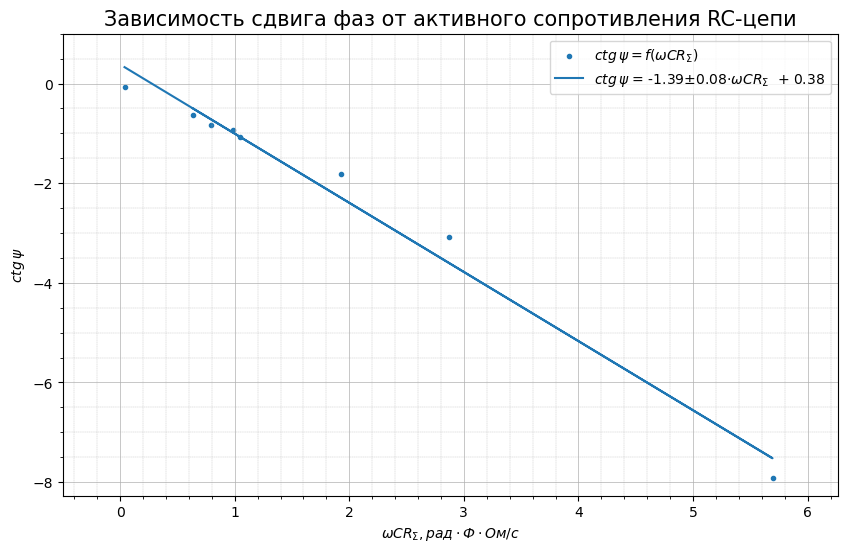

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('3.2.1.xlsx', sheet_name='RC-цепь')
names = list(data)

R = data[names[0]] + 12.4
C = 0.5 * (10 ** (-6))
w = 2 * np.pi * 1000
psi = 1 / np.tan(data[names[6]] * np.pi)
R = R * C * w

k, cov = np.polyfit(R, psi, 1, cov=True)
psip = np.polyval(k, R)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(R, psi, label ='$ctg\,\psi = f(\omega CR_{\Sigma})$', marker='.')
ax.plot(R, psip, label='$ctg\,\psi$ = '  + '{:.2f}$\pm${:.2f}'.format(k[0], np.sqrt(cov[0][0])) +  '$ \cdot \omega CR_{\Sigma}$' + '  + {:.2f}'.format(k[1]))

ax.legend(loc='upper right', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([-0.5, 1.1*R.max(), 1.1*psip.min(), 1])

ax.set_title('Зависимость сдвига фаз от активного сопротивления RC-цепи', loc='center', fontsize=15)
ax.set_xlabel('$\omega CR_{\Sigma}, рад \cdot Ф \cdot Ом/с$', loc='center', fontsize=10)
ax.set_ylabel('$ctg\,\psi$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.2.1_1.png", dpi=500)


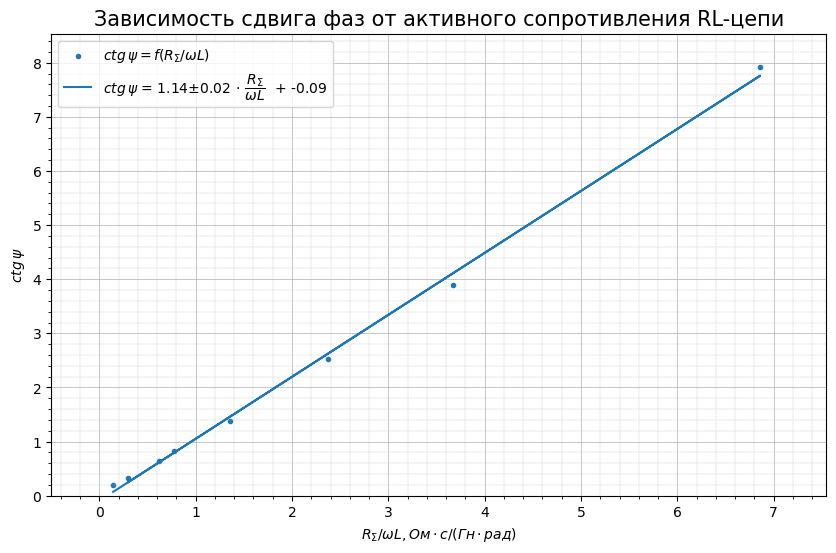

In [33]:
data = pd.read_excel('3.2.1.xlsx', sheet_name='RL-цепь')
names = list(data)

R = data[names[0]] + 12.4 + 32.41
L = 50 / 1000
w = 2 * np.pi * 1000
psi = 1 / np.tan(data[names[6]] * np.pi)
R = R / (w * L)

k, cov = np.polyfit(R, psi, 1, cov=True)
psip = np.polyval(k, R)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(R, psi, label ='$ctg\,\psi = f(R_{\Sigma}/\omega L)$', marker='.')
ax.plot(R, psip, label='$ctg\,\psi$ = '  + '{:.2f}$\pm${:.2f}'.format(k[0], np.sqrt(cov[0][0])) +  '$\,\cdot\,\dfrac{R_{\Sigma}}{\omega L}$' + '  + {:.2f}'.format(k[1]))

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([-0.5, 1.1*R.max(), 0, 1.1*psip.max()])

ax.set_title('Зависимость сдвига фаз от активного сопротивления RL-цепи', loc='center', fontsize=15)
ax.set_xlabel('$R_{\Sigma}/\omega L, Ом \cdot с / (Гн \cdot рад)$', loc='center', fontsize=10)
ax.set_ylabel('$ctg\,\psi$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.2.1_2.png", dpi=500)

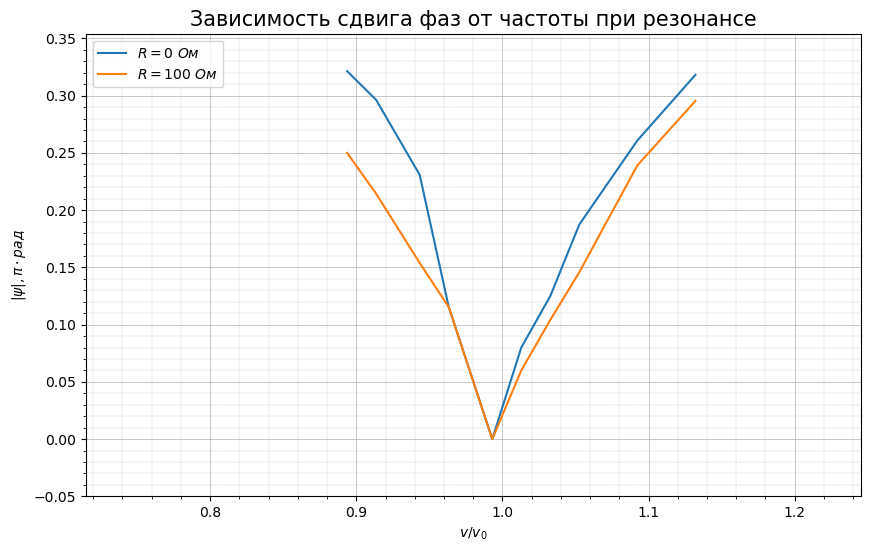

In [34]:
data = pd.read_excel('3.2.1.xlsx', sheet_name='RLC-цепь(R=0)')
names = list(data)
data = data.sort_values(by=names[1])

v0 = 1007
v1 = data[names[1]]
psi1 = data[names[7]]
f1 = v1 / v0
psi1 = np.abs(psi1)

data = pd.read_excel('3.2.1.xlsx', sheet_name='RLC-цепь(R=100)')
names = list(data)
data = data.sort_values(by=names[1])

v2 = data[names[1]]
psi2 = data[names[7]]
f2 = v2 / v0
psi2 = np.abs(psi2)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.plot(f1, psi1, label ='$R = 0~Ом$')
ax.plot(f2, psi2, label ='$R = 100~Ом$')

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0.8*f1.min(), 1.1*f1.max(), -0.05, 1.1*psi1.max()])

ax.set_title('Зависимость сдвига фаз от частоты при резонансе', loc='center', fontsize=15)
ax.set_xlabel('$v/v_0$', loc='center', fontsize=10)
ax.set_ylabel('$|\psi|, \pi \cdot рад$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.2.1_3.png", dpi=500)